<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statsmodels

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns

In [149]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/macrodata.csv',
                 index_col=0,
                 parse_dates=True
                 )

In [150]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


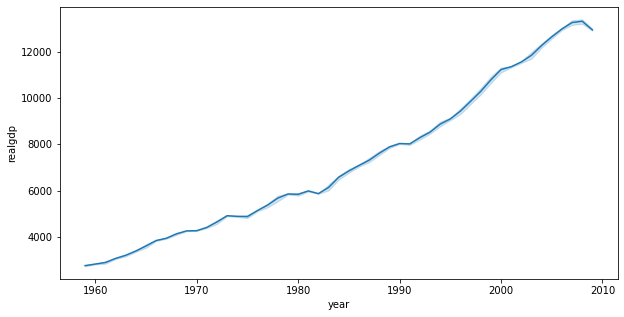

In [151]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,y='realgdp',x='year')
plt.show()

In [152]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [153]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [154]:
df['cycle'] = gdp_cycle

In [155]:
df['trend']= gdp_trend

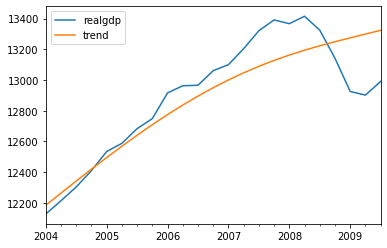

In [156]:
df[['realgdp','trend']]['2004':].plot()

In [203]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/airline_passengers.csv',
                 index_col=0,
   #              parse_dates=True
                 )

In [204]:
df.dropna()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [205]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [206]:
gdp_cycle, gdp_trend = hpfilter(df,lamb=1600)

In [207]:
df['cycle'] = gdp_cycle

In [208]:
df['trend']= gdp_trend

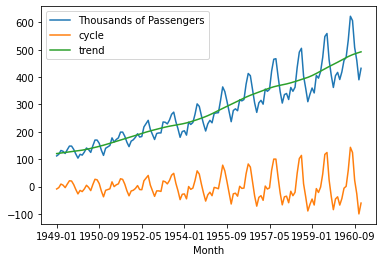

In [209]:
df.plot()

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [211]:
results = seasonal_decompose(df['Thousands of Passengers'],model='multiplicative')

AttributeError: ignored

In [212]:
df['trend2']  = results.trend


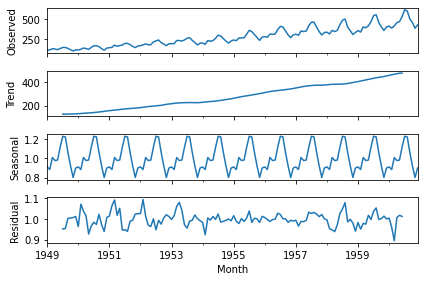

In [213]:
results.plot();

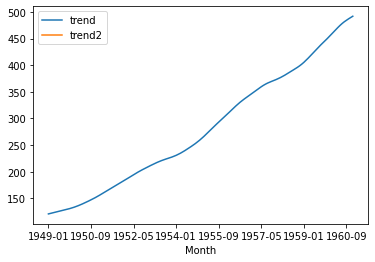

In [214]:
df['trend trend2'.split()].plot()

#EWMA Exponentially Weighted Moving Average

In [216]:
df.index = pd.to_datetime(df.index)

In [231]:
df.drop('cycle',axis=1,inplace=True)

In [232]:
df['6-month-SMA']= df['Thousands of Passengers'].rolling(window=6,center=True).mean()

In [233]:
df['12-month-SMA']= df['Thousands of Passengers'].rolling(window=12,center=True).mean()

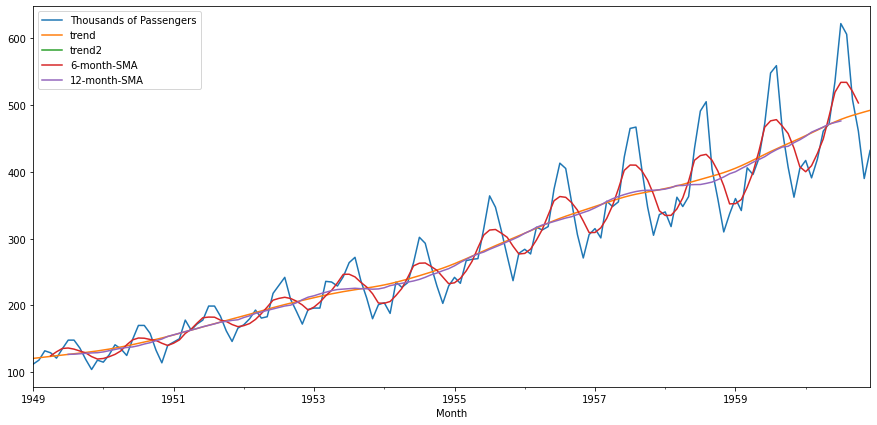

In [234]:
df.plot(figsize=(15,7))

In [236]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()

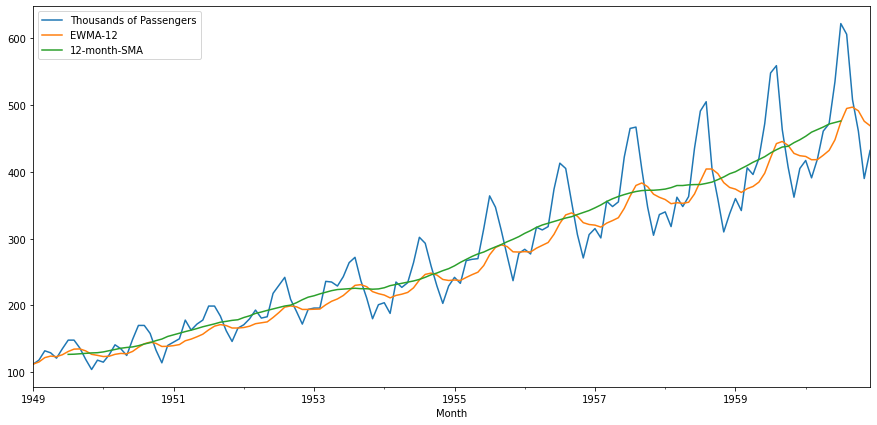

In [239]:
df[['Thousands of Passengers','EWMA-12','12-month-SMA' ]].plot(figsize=(15,7))